In [8]:
import pandas as pd
from process_MS import MS_Face_Processor
from process_Amazon import Amazon_Processor
from process_Sighthound import Sighthound_Processor
import seaborn as sn
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from PIL import Image

# Dataset 1: FACES

https://faces.mpdl.mpg.de/imeji/

171 people, roughly equally split into young (age 20-25), middle aged (45-48), old (70-77)

Six emotions for each person - anger, disgust, fear, happiness, neutrality, sadness

<img src="../Data/FACES_young_a/028_y_f_a_a.jpg" width=300 height=300>
<img src="../Data/FACES_old_a/079_o_f_h_a.jpg" width=300 height=300>




In [2]:
def operate_predictions_not_in_labels(predictions, labels):
    unique_labels = labels.unique()
    for i in range(len(predictions)):
        if predictions.iloc[i] not in unique_labels:
            predictions.at[i] = '~'+predictions.iloc[i]

In [3]:
def display_all_classification_metrics(predictions, true_labels):
    """
    Inputs as Pandas series
    """
    operate_predictions_not_in_labels(predictions, true_labels)
    confusion_matrix = pd.crosstab(classification_results['prediction'],classification_results['true_label'])
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    print(classification_report(true_labels, predictions))

# MS Face API, FACES dataset

### Old, set A

In [6]:
analyzer = MS_Face_Processor('../Outputs/MS_Face/FACES_old_a.csv')
analyzer.find_predicted_labels()
analyzer.extract_true_labels()


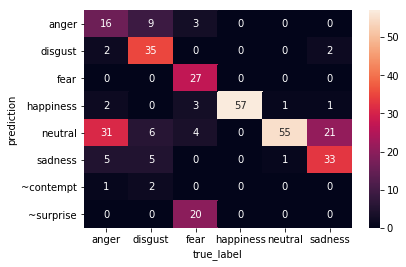

              precision    recall  f1-score   support

       anger       0.57      0.28      0.38        57
     disgust       0.90      0.61      0.73        57
        fear       1.00      0.47      0.64        57
   happiness       0.89      1.00      0.94        57
     neutral       0.47      0.96      0.63        57
     sadness       0.75      0.58      0.65        57
   ~contempt       0.00      0.00      0.00         0
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.65       342
   macro avg       0.57      0.49      0.50       342
weighted avg       0.76      0.65      0.66       342



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [9]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)


### Middle Aged, A

In [10]:
analyzer = MS_Face_Processor('../Outputs/MS_Face/FACES_middle_a.csv')
analyzer.find_predicted_labels()
analyzer.extract_true_labels()

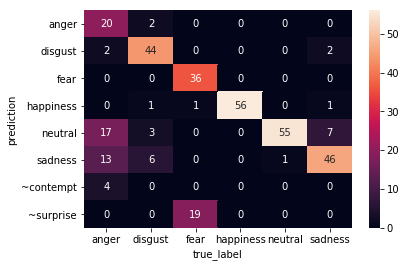

              precision    recall  f1-score   support

       anger       0.91      0.36      0.51        56
     disgust       0.92      0.79      0.85        56
        fear       1.00      0.64      0.78        56
   happiness       0.95      1.00      0.97        56
     neutral       0.67      0.98      0.80        56
     sadness       0.70      0.82      0.75        56
   ~contempt       0.00      0.00      0.00         0
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.76       336
   macro avg       0.64      0.57      0.58       336
weighted avg       0.86      0.76      0.78       336



In [11]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

### Young, a

In [12]:
analyzer = MS_Face_Processor('../Outputs/MS_Face/FACES_young_a.csv')
analyzer.find_predicted_labels()
analyzer.extract_true_labels()

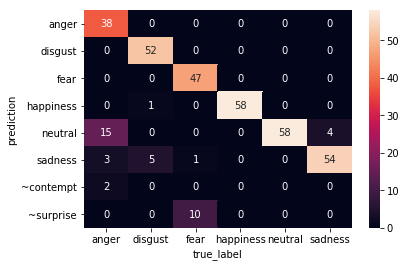

              precision    recall  f1-score   support

       anger       1.00      0.66      0.79        58
     disgust       1.00      0.90      0.95        58
        fear       1.00      0.81      0.90        58
   happiness       0.98      1.00      0.99        58
     neutral       0.75      1.00      0.86        58
     sadness       0.86      0.93      0.89        58
   ~contempt       0.00      0.00      0.00         0
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.88       348
   macro avg       0.70      0.66      0.67       348
weighted avg       0.93      0.88      0.90       348



In [13]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

# Amazon Rekognition, FACES

In [16]:
mapping = {
    'DISGUSTED': 'disgust',
    'HAPPY': 'happiness',
    'CALM': 'neutral',
    'ANGRY': 'anger',
    'SAD': 'sadness',
    'FEAR':'fear',
    'SURPRISED':'surprise',
    'CONFUSED': 'confusion'
    
}

## Old, set A

In [17]:
analyzer = Amazon_Processor('../Outputs/Amazon_Rekognition/FACES_old_a.csv')
analyzer.extract_true_labels()
analyzer.find_predicted_labels()
analyzer.results_df['prediction'] = analyzer.results_df['prediction'].apply(lambda x: mapping[x])

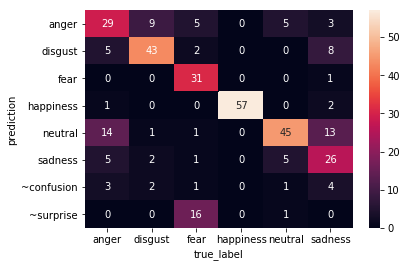

              precision    recall  f1-score   support

       anger       0.57      0.51      0.54        57
     disgust       0.74      0.75      0.75        57
        fear       0.97      0.54      0.70        57
   happiness       0.95      1.00      0.97        57
     neutral       0.61      0.79      0.69        57
     sadness       0.67      0.46      0.54        57
  ~confusion       0.00      0.00      0.00         0
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.68       342
   macro avg       0.56      0.51      0.52       342
weighted avg       0.75      0.68      0.70       342



In [18]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

### Middle Aged, A

In [19]:
analyzer = Amazon_Processor('../Outputs/Amazon_Rekognition/FACES_middle_a.csv')
analyzer.extract_true_labels()
analyzer.find_predicted_labels()
analyzer.results_df['prediction'] = analyzer.results_df['prediction'].apply(lambda x: mapping[x])

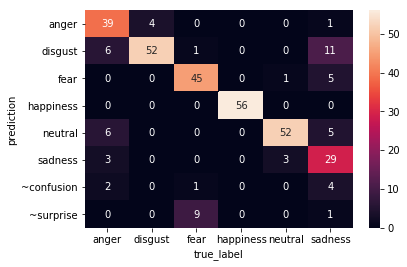

              precision    recall  f1-score   support

       anger       0.89      0.70      0.78        56
     disgust       0.74      0.93      0.83        56
        fear       0.88      0.80      0.84        56
   happiness       1.00      1.00      1.00        56
     neutral       0.83      0.93      0.87        56
     sadness       0.83      0.52      0.64        56
  ~confusion       0.00      0.00      0.00         0
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.81       336
   macro avg       0.65      0.61      0.62       336
weighted avg       0.86      0.81      0.83       336



In [20]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

### Young, A

In [22]:
analyzer = Amazon_Processor('../Outputs/Amazon_Rekognition/FACES_young_a.csv')
analyzer.extract_true_labels()
analyzer.find_predicted_labels()
analyzer.results_df['prediction'] = analyzer.results_df['prediction'].apply(lambda x: mapping[x])

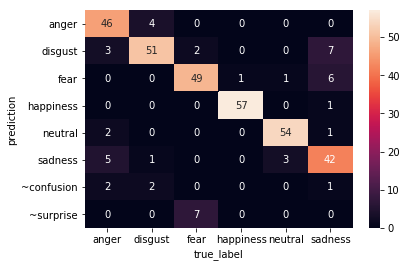

              precision    recall  f1-score   support

       anger       0.92      0.79      0.85        58
     disgust       0.81      0.88      0.84        58
        fear       0.86      0.84      0.85        58
   happiness       0.98      0.98      0.98        58
     neutral       0.95      0.93      0.94        58
     sadness       0.82      0.72      0.77        58
  ~confusion       0.00      0.00      0.00         0
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.86       348
   macro avg       0.67      0.64      0.65       348
weighted avg       0.89      0.86      0.87       348



In [23]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

# Sighthound, FACES

### Old, A

In [29]:
analyzer = Sighthound_Processor('../Outputs/Sighthound/FACES_old_a.csv')
analyzer.extract_true_labels()
analyzer.find_predicted_labels()


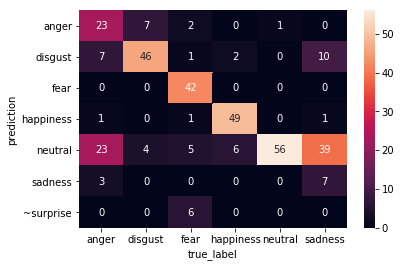

              precision    recall  f1-score   support

       anger       0.70      0.40      0.51        57
     disgust       0.70      0.81      0.75        57
        fear       1.00      0.74      0.85        57
   happiness       0.94      0.86      0.90        57
     neutral       0.42      0.98      0.59        57
     sadness       0.70      0.12      0.21        57
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.65       342
   macro avg       0.64      0.56      0.54       342
weighted avg       0.74      0.65      0.63       342



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [33]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

### Middle, A

In [37]:
analyzer = Sighthound_Processor('../Outputs/Sighthound/FACES_middle_a.csv')
analyzer.extract_true_labels()
analyzer.find_predicted_labels()


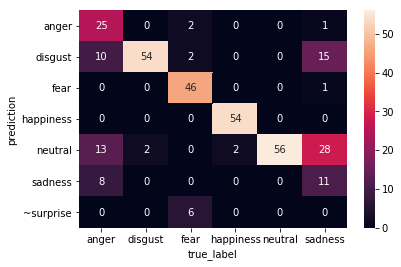

              precision    recall  f1-score   support

       anger       0.89      0.45      0.60        56
     disgust       0.67      0.96      0.79        56
        fear       0.98      0.82      0.89        56
   happiness       1.00      0.96      0.98        56
     neutral       0.55      1.00      0.71        56
     sadness       0.58      0.20      0.29        56
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.73       336
   macro avg       0.67      0.63      0.61       336
weighted avg       0.78      0.73      0.71       336



In [38]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)

### Young, a

In [40]:
analyzer = Sighthound_Processor('../Outputs/Sighthound/FACES_young_a.csv')
analyzer.extract_true_labels()
analyzer.find_predicted_labels()


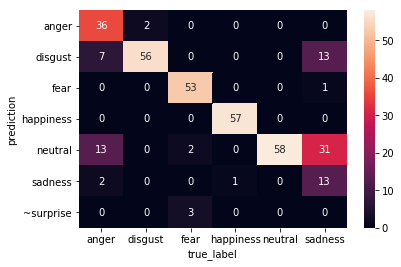

              precision    recall  f1-score   support

       anger       0.95      0.62      0.75        58
     disgust       0.74      0.97      0.84        58
        fear       0.98      0.91      0.95        58
   happiness       1.00      0.98      0.99        58
     neutral       0.56      1.00      0.72        58
     sadness       0.81      0.22      0.35        58
   ~surprise       0.00      0.00      0.00         0

    accuracy                           0.78       348
   macro avg       0.72      0.67      0.66       348
weighted avg       0.84      0.78      0.77       348



In [41]:
classification_results = analyzer.results_df[['prediction','true_label']]
display_all_classification_metrics(classification_results.prediction, classification_results.true_label)